In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
from __future__ import print_function
from numpy import *
from scipy import *
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import scipy as sp


import seawater
import datetime as dt
""
from salishsea_tools import (
    nc_tools,
    viz_tools,
    geo_tools,
    tidetools
)

import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import matplotlib.patches as patches
plt.style.use('seaborn-whitegrid')
import netCDF4 as nc

import cmocean as cm
import glob
import sys
sys.path.append('/data/tjarniko/mocsy')
sys.path.append('/data/tjarniko/MEOPAR/at3/notebooks/carbon_dev/CCCmaDEV/CCCma_src')
import mocsy
import CCCma
import CCCma_stations as cs
from matplotlib import reload
import arrow
import gsw
%matplotlib inline

/home/tjarniko/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1357: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [3]:
#spinup year
start1 = '2015-01-01'
end1 = '2015-07-29'

st = dt.datetime(2015,1,1)
en = dt.datetime(2015,7,29)

y_st = st.timetuple().tm_yday
print(y_st)
y_en = en.timetuple().tm_yday
print(y_en)
ts_1st = np.arange(y_st,y_en+1,1)


#2nd 2015 year
start2 = '2015-01-01'
end2 = '2015-07-29'

st2 = dt.datetime(2015,1,1)
en2 = dt.datetime(2015,7,29)
y_st2 = st2.timetuple().tm_yday
print(y_st2)
y_en2 = en2.timetuple().tm_yday
print(y_en2)
ts_2nd = np.arange(y_st2,y_en2+1,1)


sdir_1 = '/data/tjarniko/results/BR_1st_2015/ncs/'
sdir_2 = '/data/tjarniko/results/BR_2nd_2015_cop/SKOG_2/ncs/'

thalweg_file='/home/sallen/MEOPAR/Tools/bathymetry/thalweg_working.txt'
thalweg_pts = np.loadtxt(thalweg_file, delimiter=' ', dtype=int)

figstring = 'BR2015'

1
210
1
210


In [5]:
def make_nclen(start,end,ftype, sdir):
    base_ar = []
    sens_ar = []
    start_run = arrow.get(start)
    end_run = arrow.get(end)
    arrow_array = []
    for r in arrow.Arrow.span_range('day', start_run, end_run):
        arrow_array.append(r)

    dayslen = len(arrow_array)
    for i in range(0,dayslen):
        tdate = arrow_array[i][0]
        ddmmmyy = tdate.format('DDMMMYY').lower()
        ymd = tdate.format('YYYYMMDD')
        nc_sens = sdir + '/SKOG_1d_*'+ ftype +'_U_' + ymd + '-' + ymd + '.nc'
        tnc_sens = glob.glob(nc_sens)
        sens_ar.append(tnc_sens[0])
        #print(tnc_sens[0])
    return sens_ar

In [7]:
BR_1st = make_nclen(start1,end1,'dian', sdir_1)
BR_2nd = make_nclen(start2,end2,'dian', sdir_2)



In [8]:
def calculate_transports(files):
    stor_trans = np.zeros(len(files))

    i = 0
    for f in files:
        if i%50 == 0:
            print(i)
        G = nc.Dataset(f)
        var_tmp = G.variables['DIC_UT'][:,:,:,20]
        var_tmp[var_tmp == 1e+20] = 0
        var_tmp2 = np.sum(var_tmp)
        stor_trans[i] = var_tmp2
        i = i+1

    return stor_trans

In [9]:
def calculate_transports_surface(files):
    stor_trans = np.zeros(len(files))

    i = 0
    for f in files:
        if i%50 == 0:
            print(i)
        G = nc.Dataset(f)
        var_tmp = G.variables['DIC_UT'][:,0:5,:,20]
        var_tmp[var_tmp == 1e+20] = 0
        var_tmp2 = np.sum(var_tmp)
        stor_trans[i] = var_tmp2
        i = i+1

    return stor_trans

In [10]:
stor_transBR1 = calculate_transports(BR_1st)
stor_transBR2 = calculate_transports(BR_2nd)


0


/home/tjarniko/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:10: MaskedArrayFutureWarning: setting an item on a masked array which has a shared mask will not copy the mask and also change the original mask array in the future.
Check the NumPy 1.11 release notes for more information.


50
100
150
200
0
50
100
150
200


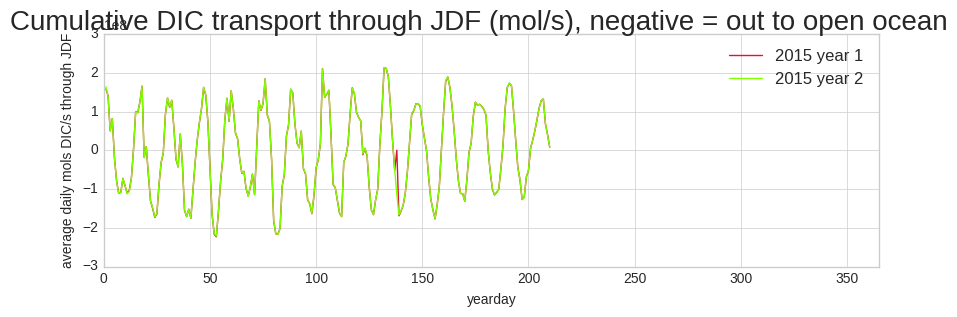

-290397.584
-321981.376


In [11]:
fig = plt.figure(figsize=(10,3))

ax = fig.add_subplot(1,1,1)
ax.plot(ts_1st,stor_transBR1,color = 'crimson',label = '2015 year 1')
ax.plot(ts_2nd,stor_transBR2,color = 'chartreuse', label = '2015 year 2')
ax.legend(loc = 'best')
plt.ylabel('average daily mols DIC/s through JDF')
plt.xlabel('yearday')
plt.xlim([0,365])

fig.suptitle('Cumulative DIC transport through JDF (mol/s), negative = out to open ocean', fontsize = 20)
plt.show()

print(sum(stor_transBR1/1000))
print(sum(stor_transBR2/1000))


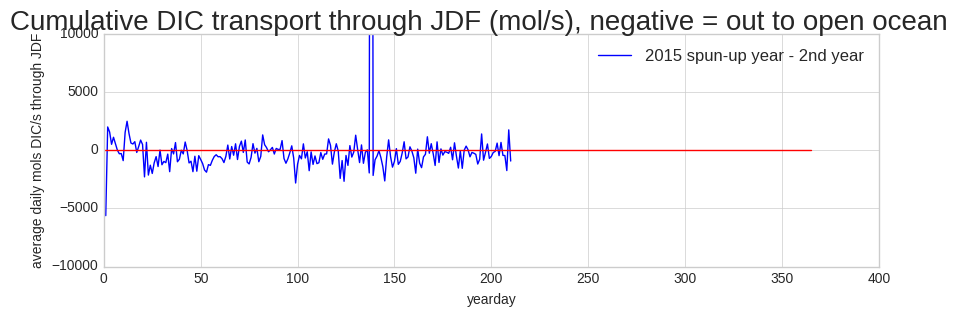

In [17]:
x = [0,365]
y = [0,0]
fig = plt.figure(figsize=(10,3))

ax = fig.add_subplot(1,1,1)
ax.plot(ts_1st,(stor_transBR1/1000) - (stor_transBR2/1000) ,color = 'blue',label = '2015 spun-up year - 2nd year')

ax.legend(loc = 'best')
plt.ylabel('average daily mols DIC/s through JDF')
plt.xlabel('yearday')
#plt.xlim([135,150])
plt.ylim([-10000,10000])
plt.plot(x,y,'red')
fig.suptitle('Cumulative DIC transport through JDF (mol/s), negative = out to open ocean', fontsize = 20)
plt.show()

In [19]:
len(stor_transBR1)
print(sum(stor_transBR1[139:210]))
print(sum(stor_transBR2[139:210]))

832958264.0
859759864.0
